In [47]:
from variational_auto_encoder import VariationalAutoEncoder

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

import random
import matplotlib.pyplot as plt
import numpy as np

from utils import load_model, load_yaml

In [48]:
# Set the configuration
config = load_yaml("/home/seungwon/Projects/deep-learning-projects/cv-04-variational-auto-encoder-pytorch/models/emnist/2023.07.05.14.04.01/config.yml")

# Training setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(config['data']['seed'])
if device == 'cuda':
  torch.cuda.manual_seed_all(config['data']['seed'])

# Set the transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize(config['data']['img_size'])])

# Set the test data
test_data = datasets.EMNIST(config['data']['data_path'],
                            download=config['data']['download'],
                            split='mnist',
                            train=False,
                            transform=transform)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=config['data']['batch_size'],
                                          shuffle=config['data']['shuffle'],
                                          num_workers=config['data']['num_workers'],
                                          drop_last=config['data']['drop_last'])

# Set the model
model = VariationalAutoEncoder(input_dim=config['model']['input_dim'], latent_z_dim=config['model']['latent_z_dim'],
                                enc_conv_filters=config['model']['enc_conv_filters'], enc_conv_kernel=config['model']['enc_conv_kernel'],
                                enc_conv_strides=config['model']['enc_conv_strides'], enc_conv_pad=config['model']['enc_conv_pad'],
                                dec_convt_filters=config['model']['dec_convt_filters'], dec_convt_kernel=config['model']['dec_convt_kernel'],
                                dec_convt_strides=config['model']['dec_convt_strides'], dec_convt_pad=config['model']['dec_convt_pad']).to(device)
model, _, _, _ = load_model('/home/seungwon/Projects/deep-learning-projects/cv-04-variational-auto-encoder-pytorch/models/emnist/2023.07.05.14.04.01/emnist_best.pt', model)
print(model)

Load the yaml file from /home/seungwon/Projects/deep-learning-projects/cv-04-variational-auto-encoder-pytorch/models/emnist/2023.07.05.14.04.01/config.yml
Loaded the model from /home/seungwon/Projects/deep-learning-projects/cv-04-variational-auto-encoder-pytorch/models/emnist/2023.07.05.14.04.01/emnist_best.pt successfully
VariationalAutoEncoder(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (mu): Linear(in_features=3136, out_features=2, bias=True)
    (log_var): Linear(in_features=3136, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (dense): Linear(in_features=2, out_features=3136, bias=True)
    (convTs): ModuleList(
      (0): ConvTranspose2d(64, 64, kernel_siz

/home/seungwon/anaconda3/envs/cv/lib/python3.8/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

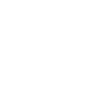

In [51]:
n_to_show = 10
np.random.seed(777)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
model.eval()

for image, label in test_loader:
    # Transfer data to device
    inputs = image.to(device)
    # Model inference
    outputs, mu, log_var = model(inputs)

    for i in range(n_to_show):        
        img = inputs[i].squeeze()
        sub = fig.add_subplot(2, n_to_show, i+1)
        sub.axis('off')
        sub.imshow(img, cmap='gray_r')

    for i in range(n_to_show):
        img = outputs[i].squeeze()
        sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
        sub.axis('off')
        sub.imshow(img, cmap='gray_r')
        
    break